In [6]:
#pip install riotwatcher

In [7]:
import requests
import json
from riotwatcher import LolWatcher, ApiError
import pandas as pd
import pprint
import time
import numpy as np

In [8]:
api_key = 'RGAPI-5a979b10-5f14-4594-9578-5168ac042af0'
watcher = LolWatcher(api_key)
my_region = 'na1'

me = watcher.summoner.by_name(my_region, 'Razei')
print(me)

{'id': 'aZMEYFiCcsaOrIMqgE3BvP0pft3h3SLmrfMZM0D_lbsnFZ8', 'accountId': 'NXch5UZaT-3KqzmIlcuGyhRBA-EsThsMFqQuKm7kXow61Q', 'puuid': 'MbAw2AxC6jMJrosC_xpz-T76NW3D6bupbFlCUGZAYFpRH7J3oL6FMici0qTMZPo1XJ4Mozrhn2_zBQ', 'name': 'Razei', 'profileIconId': 508, 'revisionDate': 1650172254000, 'summonerLevel': 301}


In [9]:
my_ranked_stats = watcher.league.by_summoner(my_region, me['id'])
pprint.pprint(my_ranked_stats)

[{'freshBlood': False,
  'hotStreak': False,
  'inactive': False,
  'leagueId': 'eacbcca2-2861-402b-b738-f684da32edbf',
  'leaguePoints': 2,
  'losses': 90,
  'queueType': 'RANKED_FLEX_SR',
  'rank': 'I',
  'summonerId': 'aZMEYFiCcsaOrIMqgE3BvP0pft3h3SLmrfMZM0D_lbsnFZ8',
  'summonerName': 'Razei',
  'tier': 'PLATINUM',
  'veteran': False,
  'wins': 91}]


In [10]:
total_games_plays = my_ranked_stats[0]['wins'] + my_ranked_stats[0]['losses']

my_matches = []

my_matches.extend(watcher.match.matchlist_by_puuid('americas', me['puuid'], 0, 100))
pprint.pprint(my_matches)

['NA1_4280888174',
 'NA1_4280916068',
 'NA1_4280933721',
 'NA1_4280932107',
 'NA1_4279695107',
 'NA1_4279668215',
 'NA1_4279621843',
 'NA1_4279595569',
 'NA1_4279527961',
 'NA1_4279552190',
 'NA1_4279283515',
 'NA1_4279271353',
 'NA1_4278998069',
 'NA1_4278966623',
 'NA1_4278984129',
 'NA1_4276702437',
 'NA1_4276593944',
 'NA1_4274741261',
 'NA1_4273788652',
 'NA1_4273786835',
 'NA1_4273766169',
 'NA1_4273774320',
 'NA1_4273574891',
 'NA1_4273557837',
 'NA1_4272221857',
 'NA1_4272169231',
 'NA1_4269737723',
 'NA1_4269704272',
 'NA1_4263463176',
 'NA1_4263461087',
 'NA1_4263428185',
 'NA1_4263415065',
 'NA1_4261438986',
 'NA1_4261407831',
 'NA1_4261450115',
 'NA1_4259722476',
 'NA1_4260677732',
 'NA1_4260644937',
 'NA1_4260659846',
 'NA1_4259615084',
 'NA1_4259594245',
 'NA1_4258666602',
 'NA1_4258671478',
 'NA1_4258634763',
 'NA1_4258640045',
 'NA1_4258560537',
 'NA1_4258513241',
 'NA1_4257634684',
 'NA1_4257527563',
 'NA1_4257541308',
 'NA1_4257454685',
 'NA1_4257337401',
 'NA1_425673

In [11]:
#my_matches = watcher.match.matchlist_by_puuid('americas', me['puuid'])
table = []
for my_match in my_matches:
    match_detail = watcher.match.by_id('americas', my_match)

    info = {}
    team_total_damages_to_champs = 0
    
    try:
    
        if match_detail["info"]['gameMode'] == 'CLASSIC':
            for participant in match_detail["info"]["participants"]:
                if participant["summonerName"] == me['name']:
                    info["ChampionName"] = participant['championName']
                    info["ChampionLevel"] = participant['champLevel']
                    info["Lane"] = participant['lane']
                    info["Kills"] = participant['kills']
                    info["Deaths"] = participant['deaths']
                    info["Assists"] = participant['assists']
                    info["Gold_Earned"] = participant['goldEarned']
                    info["Total_Minions_Killed"] = participant['totalMinionsKilled']
                    info["Total_damages_to_champs"] = participant['totalDamageDealtToChampions']
                    info["Win/Lose"] = participant['win']
                    info["TeamBaronKills"] = participant['challenges']['teamBaronKills']
                    info["FirstBloodAssist"] = participant['firstBloodAssist']
                    info["FirstBloodKill"] = participant['firstBloodKill']
                    info["FirstTowerAssist"] = participant['firstTowerAssist']
                    info["FirstTowerKill"] = participant['firstTowerKill']
                    info["InhibitorKills"] = participant['inhibitorKills']
                    info["InhibitorTakedowns"] = participant['inhibitorTakedowns']
                    info["InhibitorsLost"] = participant['inhibitorsLost']
                    info["TurretPlatesTaken"] = participant['challenges']['turretPlatesTaken']



            for participant in match_detail["info"]["participants"]:
                if participant['win'] == info["Win/Lose"]:
                    team_total_damages_to_champs += participant['totalDamageDealtToChampions']

            info["TotalDamageDealtToChampions_Percentage"] = round(info["Total_damages_to_champs"] / team_total_damages_to_champs * 100, 2)

            table.append(info)
            time.sleep(0.1)

    except:
        print('Error')

pprint.pprint(table)


[{'Assists': 9,
  'ChampionLevel': 16,
  'ChampionName': 'Akshan',
  'Deaths': 5,
  'FirstBloodAssist': False,
  'FirstBloodKill': False,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 13971,
  'InhibitorKills': 1,
  'InhibitorTakedowns': 1,
  'InhibitorsLost': 0,
  'Kills': 11,
  'Lane': 'MIDDLE',
  'TeamBaronKills': 1,
  'TotalDamageDealtToChampions_Percentage': 18.24,
  'Total_Minions_Killed': 167,
  'Total_damages_to_champs': 17834,
  'TurretPlatesTaken': 3,
  'Win/Lose': True},
 {'Assists': 3,
  'ChampionLevel': 14,
  'ChampionName': 'Leblanc',
  'Deaths': 4,
  'FirstBloodAssist': False,
  'FirstBloodKill': False,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 12162,
  'InhibitorKills': 0,
  'InhibitorTakedowns': 0,
  'InhibitorsLost': 4,
  'Kills': 8,
  'Lane': 'MIDDLE',
  'TeamBaronKills': 0,
  'TotalDamageDealtToChampions_Percentage': 20.64,
  'Total_Minions_Killed': 162,
  'Total_damages_to_champs': 15266,
  'TurretPlatesTake

In [12]:
df = pd.DataFrame(table)
df

,ChampionName,ChampionLevel,Lane,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,Win/Lose,TeamBaronKills,FirstBloodAssist,FirstBloodKill,FirstTowerAssist,FirstTowerKill,InhibitorKills,InhibitorTakedowns,InhibitorsLost,TurretPlatesTaken,TotalDamageDealtToChampions_Percentage
0,Akshan,16,MIDDLE,11,5,9,13971,167,17834,True,1,False,False,False,False,1,1,0,3,18.24
1,Leblanc,14,MIDDLE,8,4,3,12162,162,15266,False,0,False,False,False,False,0,0,4,0,20.64
2,Orianna,15,MIDDLE,7,1,15,11710,182,14815,True,1,True,False,False,False,0,0,0,3,23.03
3,Leblanc,14,MIDDLE,7,2,0,10049,150,11777,True,1,False,False,False,False,0,0,0,2,17.78
4,Qiyana,15,MIDDLE,9,7,8,12944,179,22214,False,0,False,True,False,False,0,0,3,0,23.26
5,Ahri,12,NONE,5,1,3,7198,130,7227,True,0,True,False,False,False,0,0,0,0,18.91
6,Akshan,18,MIDDLE,13,4,3,18747,260,22982,True,1,False,False,False,True,0,0,0,2,23.74
7,Akshan,15,MIDDLE,7,0,1,12749,222,14338,True,1,False,False,False,True,2,2,0,4,27.50
8,Orianna,18,MIDDLE,7,5,15,14132,234,20532,False,1,False,False,False,False,0,0,2,0,19.69
9,Lulu,13,BOTTOM,2,5,12,7239,43,5557,False,0,False,False,False,False,0,0,2,0,7.62


In [13]:
CookiesandCream_df = pd.read_csv("Resources/CookiesandCream_Gold.csv")
CookiesandCream_df = CookiesandCream_df.drop(['Unnamed: 0'], axis = 1)

trade_df = pd.read_csv("Resources/I_will_trade_Challenger.csv")
trade_df  = trade_df .drop(['Unnamed: 0'], axis = 1)

iron_4 = pd.read_csv("Resources/iron_4_Iron.csv")
iron_4  = iron_4.drop(['Unnamed: 0'], axis = 1)

MeleezaNoober_df = pd.read_csv("Resources/MeleezaNoober_Silver.csv")
MeleezaNoober_df = MeleezaNoober_df.drop(['Unnamed: 0'], axis = 1)

Razei_df = pd.read_csv("Resources/Razei_Platinum.csv")
Razei_df = Razei_df.drop(['Unnamed: 0'], axis = 1)

soldr_df = pd.read_csv("Resources/Soldr_Diamond.csv")
soldr_df  = soldr_df.drop(['Unnamed: 0'], axis = 1)

syptime_df = pd.read_csv("Resources/syptime_Bronze.csv")
syptime_df  = syptime_df.drop(['Unnamed: 0'], axis = 1)

xRoyal_Master_df = pd.read_csv("Resources/xRoyal_Master.csv")
xRoyal_Master_df  = xRoyal_Master_df .drop(['Unnamed: 0'], axis = 1)

Yozu_Grandmaster_df = pd.read_csv("Resources/Yozu_Grandmaster.csv")
Yozu_Grandmaster_df = Yozu_Grandmaster_df.drop(['Unnamed: 0'], axis = 1)


In [14]:
frames = [df, CookiesandCream_df, trade_df, iron_4, 
          MeleezaNoober_df, Razei_df,soldr_df, syptime_df, xRoyal_Master_df, Yozu_Grandmaster_df]
df_final = pd.concat(frames)
df_final = pd.get_dummies(df_final,
                          columns=['Lane','FirstBloodAssist', 'FirstBloodKill', 'FirstTowerKill', 'FirstTowerAssist'])
df_final['Win'] = np.where(df_final['Win/Lose'] == True, 1, 0) 
df_final = df_final.drop(['Win/Lose', 'ChampionName'], axis = 1)
df_final

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True,Win
0,16,11,5,9,13971,167,17834,1,1,1,...,0,1,0,1,0,1,0,1,0,1
1,14,8,4,3,12162,162,15266,0,0,0,...,0,1,0,1,0,1,0,1,0,0
2,15,7,1,15,11710,182,14815,1,0,0,...,0,0,1,1,0,1,0,1,0,1
3,14,7,2,0,10049,150,11777,1,0,0,...,0,1,0,1,0,1,0,1,0,1
4,15,9,7,8,12944,179,22214,0,0,0,...,0,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,14,5,3,9,11586,40,26904,2,0,1,...,0,1,0,1,0,0,1,1,0,1
85,11,7,9,7,9949,27,26613,0,0,0,...,0,1,0,1,0,1,0,0,1,0
86,15,9,8,4,14122,200,20101,1,1,2,...,0,1,0,1,0,0,1,1,0,1
87,10,9,0,1,8057,120,8875,0,0,0,...,0,1,0,1,0,0,1,1,0,1


In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [16]:
y = df_final['Win']
X = df_final.drop(['Win'], axis = 1)

In [17]:
X.corr()

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_NONE,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True
ChampionLevel,1.000000,0.580423,0.352123,0.380634,0.876569,0.591065,0.711277,0.463913,0.238631,0.274456,...,-0.569491,0.167168,-0.105798,0.105798,-0.028014,0.028014,-0.060896,0.060896,-0.023147,0.023147
Kills,0.580423,1.000000,0.149046,0.113380,0.809165,0.473079,0.805780,0.284094,0.209423,0.215514,...,-0.235154,-0.018725,-0.180572,0.180572,-0.092268,0.092268,-0.119794,0.119794,-0.065196,0.065196
Deaths,0.352123,0.149046,1.000000,0.159568,0.307874,0.086845,0.317861,0.094924,-0.051683,-0.103496,...,-0.332826,0.117548,-0.003787,0.003787,0.006485,-0.006485,0.076961,-0.076961,0.089202,-0.089202
Assists,0.380634,0.113380,0.159568,1.000000,0.279381,-0.189204,0.211637,0.353821,0.087689,0.350975,...,-0.305961,-0.193284,-0.133071,0.133071,0.036064,-0.036064,0.015374,-0.015374,-0.067015,0.067015
Gold_Earned,0.876569,0.809165,0.307874,0.279381,1.000000,0.685628,0.876050,0.437637,0.286944,0.286860,...,-0.448281,0.088429,-0.139418,0.139418,-0.078390,0.078390,-0.124854,0.124854,-0.048991,0.048991
Total_Minions_Killed,0.591065,0.473079,0.086845,-0.189204,0.685628,1.000000,0.624286,0.173417,0.221545,0.084397,...,-0.209773,0.298334,-0.041601,0.041601,-0.050504,0.050504,-0.079162,0.079162,0.009794,-0.009794
Total_damages_to_champs,0.711277,0.805780,0.317861,0.211637,0.876050,0.624286,1.000000,0.308888,0.211930,0.182219,...,-0.329435,0.076915,-0.132375,0.132375,-0.030533,0.030533,-0.083330,0.083330,-0.027655,0.027655
TeamBaronKills,0.463913,0.284094,0.094924,0.353821,0.437637,0.173417,0.308888,1.000000,0.273598,0.416867,...,-0.229870,0.024849,-0.074297,0.074297,-0.056002,0.056002,-0.015626,0.015626,0.029835,-0.029835
InhibitorKills,0.238631,0.209423,-0.051683,0.087689,0.286944,0.221545,0.211930,0.273598,1.000000,0.647103,...,-0.101898,-0.001288,-0.014662,0.014662,-0.012761,0.012761,-0.152331,0.152331,-0.000722,0.000722
InhibitorTakedowns,0.274456,0.215514,-0.103496,0.350975,0.286860,0.084397,0.182219,0.416867,0.647103,1.000000,...,-0.161385,-0.046550,-0.079890,0.079890,0.017209,-0.017209,-0.092281,0.092281,-0.034949,0.034949


In [18]:
#pip install seaborn

In [19]:
import seaborn as sn

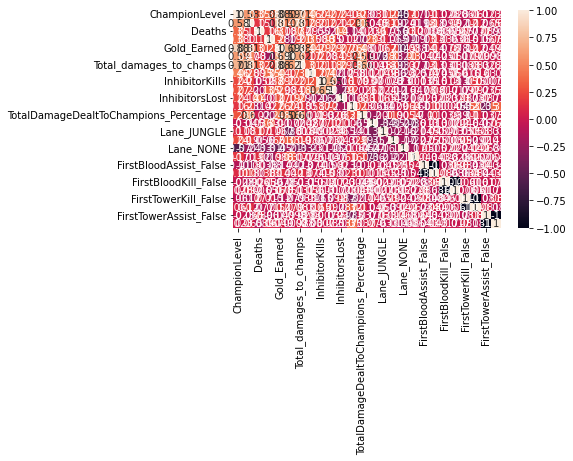

In [20]:
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (12,8)

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [22]:
# split dataset into 70% training set and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)
X_train.head()

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_NONE,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True
79,10,0,5,0,5167,102,2945,0,0,0,...,1,0,1,0,1,0,1,0,1,0
22,3,0,0,0,1043,18,755,0,0,0,...,1,0,1,0,1,0,1,0,1,0
55,17,13,8,5,15856,232,27719,1,0,1,...,0,0,0,1,1,0,1,0,1,0
6,18,13,4,3,18747,260,22982,1,0,0,...,0,0,1,0,1,0,0,1,1,0
92,12,1,5,18,6977,12,6313,1,0,0,...,0,0,1,0,1,0,1,0,1,0


In [23]:
model = LogisticRegression(solver = 'lbfgs').fit(X_train,y_train)

C:\Users\hong7\anacondanew\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Training Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.8648648648648649
Training Data Score: 0.8509803921568627


In [25]:
print(X_test)
print(y_test)

    ChampionLevel  Kills  Deaths  Assists  Gold_Earned  Total_Minions_Killed  \
56             16      8       7        8        14027                   227   
34             18     10       7       15        17556                   203   
69             18     21      16        5        23203                   200   
64             17     12       6        3        14086                   199   
85             11      7       9        7         9949                    27   
..            ...    ...     ...      ...          ...                   ...   
8              12      6       1        5         9161                   141   
88              6      0       1        4         2819                    13   
43             18     18       7       13        21159                   228   
18             11      2       4        0         6688                   119   
76              8      2       5        2         5328                    91   

    Total_damages_to_champs  TeamBaronK

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
confusion_matrix(y_test, y_pred)

array([[ 97,  23],
       [ 15, 120]], dtype=int64)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       120
           1       0.84      0.89      0.86       135

    accuracy                           0.85       255
   macro avg       0.85      0.85      0.85       255
weighted avg       0.85      0.85      0.85       255



In [30]:
lane = df.groupby(['Win/Lose','Lane'])['Win/Lose'].count().unstack().fillna(0)

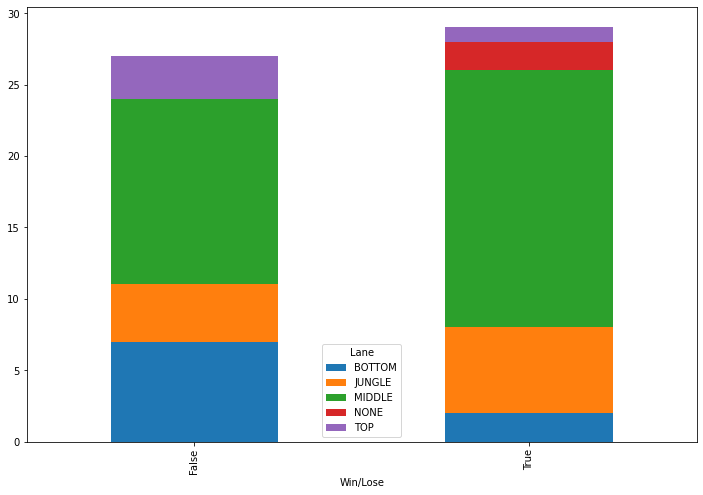

In [31]:
lane.plot(kind='bar', stacked=True)
plt.savefig("images/bar.png",bbox_inches = "tight")

## Side by Side boxplot to find relation between individual numeric variables and win/lose

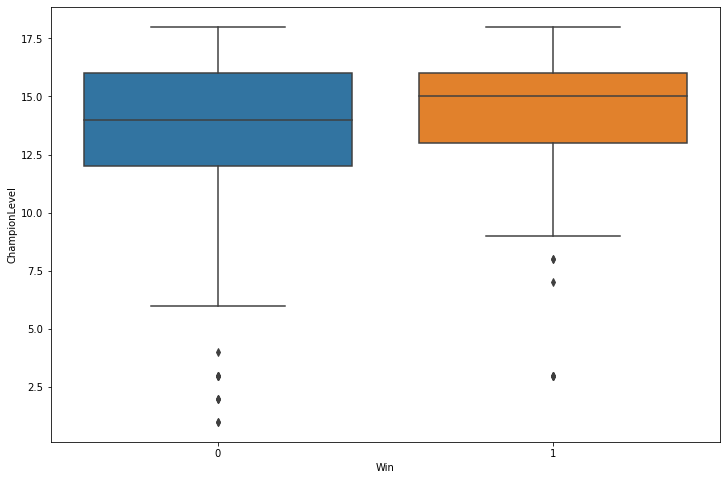

In [32]:
sn.boxplot(x='Win', y='ChampionLevel', data=df_final)
plt.savefig("images/ChampionLevel vs. Win_Lose.png",bbox_inches = "tight")

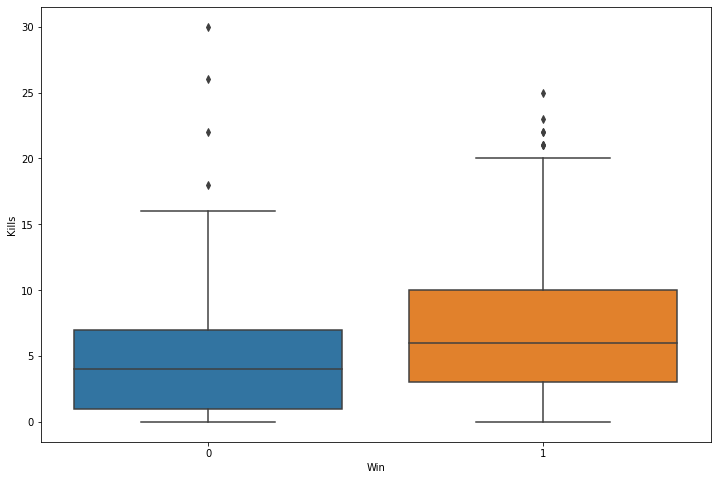

In [33]:
sn.boxplot(x='Win', y='Kills', data=df_final)
plt.savefig("images/Kills vs. Win_Lose.png",bbox_inches = "tight")

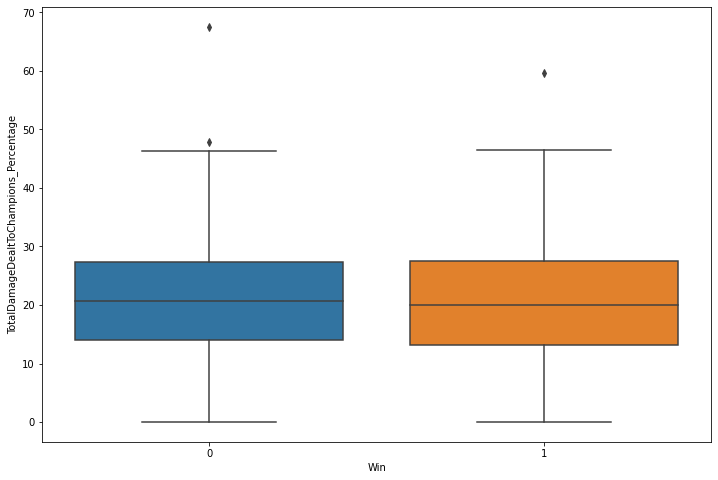

In [34]:
sn.boxplot(x='Win', y='TotalDamageDealtToChampions_Percentage', data=df_final)
plt.savefig("images/TotalDamageDealtToChampions_Percentage vs. Win_Lose.png",bbox_inches = "tight")

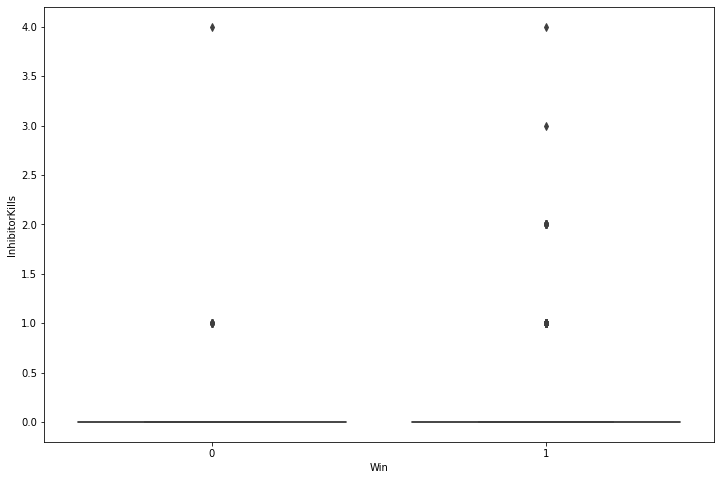

In [35]:
sn.boxplot(x='Win', y='InhibitorKills', data=df_final)
plt.savefig("images/InhibitorKills vs. Win_Lose.png",bbox_inches = "tight")

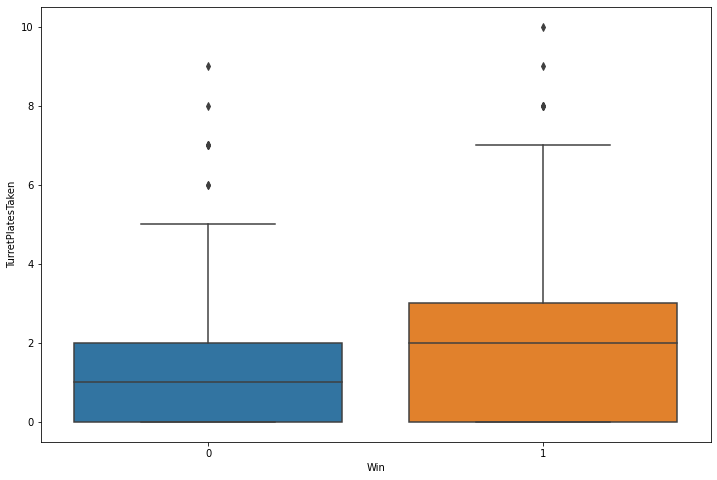

In [36]:
sn.boxplot(x='Win', y='TurretPlatesTaken', data=df_final)
plt.savefig("images/TurretPlatesTaken vs. Win_Lose.png",bbox_inches = "tight")

In [37]:
user_input = input("Who do you want to analyze? (Type in the desired User ID:)")
new_me = watcher.summoner.by_name(my_region, user_input)
print(new_me)

Who do you want to analyze? (Type in the desired User ID:)Evish
{'id': '6P1qXUhsDnWy_Em3QFRL9sy8z6mxr5usHnQQP158i9r-eg0', 'accountId': 'qGoawZI1H5ciZtLnOUzhbC7V5CamIYgivdLf7bQFZXhvwA', 'puuid': 'gYbM-WLV8AcByCNO3IhaeX5V3pXNRQ4j1cBhreMaxJThEzfgI3ztZll0t5Bwwzfo-03ai7abOh0FwQ', 'name': 'Evish', 'profileIconId': 4424, 'revisionDate': 1646555717000, 'summonerLevel': 428}


In [38]:
user_ranked_stats = watcher.league.by_summoner(my_region, new_me['id'])
pprint.pprint(user_ranked_stats)

[{'freshBlood': False,
  'hotStreak': False,
  'inactive': False,
  'leagueId': '07b06519-75a4-4217-aba2-ba8b7010ce7c',
  'leaguePoints': 34,
  'losses': 47,
  'queueType': 'RANKED_SOLO_5x5',
  'rank': 'IV',
  'summonerId': '6P1qXUhsDnWy_Em3QFRL9sy8z6mxr5usHnQQP158i9r-eg0',
  'summonerName': 'Evish',
  'tier': 'PLATINUM',
  'veteran': False,
  'wins': 62}]


In [39]:
new_total_games_plays = user_ranked_stats[0]['wins'] + user_ranked_stats[0]['losses']

user_matches = []

user_matches.extend(watcher.match.matchlist_by_puuid('americas', new_me['puuid'], 0, 100))
pprint.pprint(user_matches)

['NA1_4239003952',
 'NA1_4238948797',
 'NA1_4238954798',
 'NA1_4238917821',
 'NA1_4238880395',
 'NA1_4238825690',
 'NA1_4238736822',
 'NA1_4238689681',
 'NA1_4238644547',
 'NA1_4238578766',
 'NA1_4238565964',
 'NA1_4236191211',
 'NA1_4236117813',
 'NA1_4236125770',
 'NA1_4236092761',
 'NA1_4236057922',
 'NA1_4236061987',
 'NA1_4235969388',
 'NA1_4235963371',
 'NA1_4232424861',
 'NA1_4232450768',
 'NA1_4232378306',
 'NA1_4232384364',
 'NA1_4232371744',
 'NA1_4232088306',
 'NA1_4232066500',
 'NA1_4231970485',
 'NA1_4231878292',
 'NA1_4231912529',
 'NA1_4231857793',
 'NA1_4231834040',
 'NA1_4231767948',
 'NA1_4231782270',
 'NA1_4231740581',
 'NA1_4231686553',
 'NA1_4231683994',
 'NA1_4231710429',
 'NA1_4231638084',
 'NA1_4231634567',
 'NA1_4231609506',
 'NA1_4229140504',
 'NA1_4229097768',
 'NA1_4229065756',
 'NA1_4229073762',
 'NA1_4229061985',
 'NA1_4228745324',
 'NA1_4228675163',
 'NA1_4228681800',
 'NA1_4228105069',
 'NA1_4228097494',
 'NA1_4228055632',
 'NA1_4228053327',
 'NA1_422804

In [48]:
table_1 = []
no_challenges_count = 0
for user_match in user_matches:
    match_detail = watcher.match.by_id('americas', user_match)
    if match_detail["info"]['gameMode'] != 'CLASSIC':
        continue
    
    try:
        info = {}
        team_total_damages_to_champs = 0
        for participant in match_detail["info"]["participants"]:
            if participant["summonerName"] == new_me['name']:
                info["ChampionName"] = participant['championName']
                info["ChampionLevel"] = participant['champLevel']
                info["Lane"] = participant['lane']
                info["Kills"] = participant['kills']
                info["Deaths"] = participant['deaths']
                info["Assists"] = participant['assists']
                info["Gold_Earned"] = participant['goldEarned']
                info["Total_Minions_Killed"] = participant['totalMinionsKilled']
                info["Total_damages_to_champs"] = participant['totalDamageDealtToChampions']
                info["Win/Lose"] = participant['win']
                info["TeamBaronKills"] = participant['challenges']['teamBaronKills'] 
                info["FirstBloodAssist"] = participant['firstBloodAssist']
                info["FirstBloodKill"] = participant['firstBloodKill']
                info["FirstTowerAssist"] = participant['firstTowerAssist']
                info["FirstTowerKill"] = participant['firstTowerKill']
                info["InhibitorKills"] = participant['inhibitorKills']
                info["InhibitorTakedowns"] = participant['inhibitorTakedowns']
                info["InhibitorsLost"] = participant['inhibitorsLost']
                info["TurretPlatesTaken"] = participant['challenges']['turretPlatesTaken'] 


        for participant in match_detail["info"]["participants"]:
            if participant['win'] == info["Win/Lose"]:
                team_total_damages_to_champs += participant['totalDamageDealtToChampions']

        info["TotalDamageDealtToChampions_Percentage"] = round(info["Total_damages_to_champs"] / team_total_damages_to_champs * 100, 2)

        table_1.append(info)
        time.sleep(0.1)
    except:
        print(f"Failed to get match detail for match {user_match}")
        
    break

pprint.pprint(table_1)


[{'Assists': 8,
  'ChampionLevel': 14,
  'ChampionName': 'Senna',
  'Deaths': 12,
  'FirstBloodAssist': False,
  'FirstBloodKill': False,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 10493,
  'InhibitorKills': 0,
  'InhibitorTakedowns': 0,
  'InhibitorsLost': 1,
  'Kills': 3,
  'Lane': 'BOTTOM',
  'TeamBaronKills': 0,
  'TotalDamageDealtToChampions_Percentage': 8.85,
  'Total_Minions_Killed': 34,
  'Total_damages_to_champs': 10313,
  'TurretPlatesTaken': 1,
  'Win/Lose': False}]


In [41]:
user_data = {}
user_data['ChampionName'] = info['ChampionName']
user_data['ChampionLevel'] = info['ChampionLevel']
user_data['Kills'] = info['Kills']
user_data['Deaths'] = info['Deaths']
user_data['Assists'] = info['Assists']
user_data['Gold_Earned'] = info['Gold_Earned']
user_data['Total_Minions_Killed'] = info['Total_Minions_Killed']
user_data['Total_damages_to_champs'] = info['Total_damages_to_champs']
user_data['TeamBaronKills'] = info['TeamBaronKills']
user_data['InhibitorKills'] = info['InhibitorKills']
user_data['InhibitorTakedowns'] = info['InhibitorTakedowns']
user_data['InhibitorsLost'] = info['InhibitorsLost']
user_data['TurretPlatesTaken'] = info['TurretPlatesTaken']
user_data['TotalDamageDealtToChampions_Percentage'] = info['TotalDamageDealtToChampions_Percentage']
user_data['Win/Lose'] = info["Win/Lose"]
    
if info['Lane'] == "BOTTOM":
    user_data['Lane_BOTTOM'] = 1 
    user_data['Lane_MIDDLE'] = 0 
    user_data['Lane_JUNGLE'] = 0 
    user_data['Lane_NONE'] = 0 
    user_data['Lane_TOP'] = 0
elif info['Lane'] == "MIDDLE":
    user_data['Lane_MIDDLE'] = 1 
    user_data['Lane_BOTTOM'] = 0  
    user_data['Lane_JUNGLE'] = 0 
    user_data['Lane_NONE'] = 0 
    user_data['Lane_TOP'] = 0
elif info['Lane'] == "JUNGLE":
    user_data['Lane_JUNGLE'] = 1 
    user_data['Lane_BOTTOM'] = 0 
    user_data['Lane_MIDDLE'] = 0 
    user_data['Lane_NONE'] = 0 
    user_data['Lane_TOP'] = 0
elif info['Lane'] == "TOP":
    user_data['Lane_TOP'] = 1 
    user_data['Lane_BOTTOM'] = 0 
    user_data['Lane_MIDDLE'] = 0 
    user_data['Lane_JUNGLE'] = 0 
    user_data['Lane_NONE'] = 0
elif info['Lane'] == "NONE":
    user_data['Lane_NONE'] = 1 
    user_data['Lane_BOTTOM'] = 0 
    user_data['Lane_MIDDLE'] = 0 
    user_data['Lane_JUNGLE'] = 0 
    user_data['Lane_TOP'] = 0
    
if info['FirstBloodAssist'] == False:
    user_data['FirstBloodAssist_False'] = 1 
    user_data['FirstBloodAssist_True'] = 0
elif info['FirstBloodAssist'] == True:
    user_data['FirstBloodAssist_False'] = 0 
    user_data['FirstBloodAssist_True'] = 1
    

if info['FirstBloodKill'] == False:
    user_data['FirstBloodKill_False'] = 1 
    user_data['FirstBloodKill_True'] = 0
elif info['FirstBloodKill'] == True:
    user_data['FirstBloodKill_False'] = 0  
    user_data['FirstBloodKill_True'] = 1
    
if info['FirstTowerKill'] == False:
    user_data['FirstTowerKill_False'] = 1 
    user_data['FirstTowerKill_True'] = 0
elif info['FirstTowerKill'] == True:
    user_data['FirstTowerKill_False'] = 0 
    user_data['FirstTowerKill_True'] = 1
        
if info['FirstTowerAssist'] == False:
    user_data['FirstTowerAssist_False'] = 1 
    user_data['FirstTowerAssist_True'] = 0
elif info['FirstTowerAssist'] == True:
    user_data['FirstTowerAssist_False'] = 0 
    user_data['FirstTowerAssist_True'] = 1


user_data

{'ChampionName': 'Senna',
 'ChampionLevel': 14,
 'Kills': 3,
 'Deaths': 12,
 'Assists': 8,
 'Gold_Earned': 10493,
 'Total_Minions_Killed': 34,
 'Total_damages_to_champs': 10313,
 'TeamBaronKills': 0,
 'InhibitorKills': 0,
 'InhibitorTakedowns': 0,
 'InhibitorsLost': 1,
 'TurretPlatesTaken': 1,
 'TotalDamageDealtToChampions_Percentage': 8.85,
 'Win/Lose': False,
 'Lane_BOTTOM': 1,
 'Lane_MIDDLE': 0,
 'Lane_JUNGLE': 0,
 'Lane_NONE': 0,
 'Lane_TOP': 0,
 'FirstBloodAssist_False': 1,
 'FirstBloodAssist_True': 0,
 'FirstBloodKill_False': 1,
 'FirstBloodKill_True': 0,
 'FirstTowerKill_False': 1,
 'FirstTowerKill_True': 0,
 'FirstTowerAssist_False': 1,
 'FirstTowerAssist_True': 0}

In [42]:
table_2 = []
table_2.append(user_data)
df_user = pd.DataFrame(table_2)
df_user

,ChampionName,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,...,Lane_NONE,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True
0,Senna,14,3,12,8,10493,34,10313,0,0,...,0,0,1,0,1,0,1,0,1,0


In [43]:
df_user["Win"] = np.where(df_user['Win/Lose'] == True, 1, 0)
df_user = df_user.drop(['Win/Lose', 'ChampionName'], axis = 1)
df_user


,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True,Win
0,14,3,12,8,10493,34,10313,0,0,0,...,0,1,0,1,0,1,0,1,0,0


In [49]:
X_user = df_user.drop(["Win"], axis=1)
y_user = df_user["Win"]
X_user

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,Lane_NONE,Lane_TOP,FirstBloodAssist_False,FirstBloodAssist_True,FirstBloodKill_False,FirstBloodKill_True,FirstTowerKill_False,FirstTowerKill_True,FirstTowerAssist_False,FirstTowerAssist_True
0,14,3,12,8,10493,34,10313,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [45]:
y_user_pred = model.predict(X_user)
print(y_user_pred)

[0]


In [50]:
if y_user_pred == 0:
    print(f"Unfortunately, we think {user_input} lost the last game.")
elif y_user_pred == 1:
    print(f"Yay! We think {user_input} won the last game!")

Unfortunately, we think Evish lost the last game.


In [47]:
print("Let's fact-check our prediction...")
if y_user_pred[0] == y_user[0]:
    print("Yes, our prediction is accurate.")
else:
    print("Oops, our prediction is wrong.")

Let's fact-check our prediction...
Yes, our prediction is accurate.
